<a href="https://colab.research.google.com/github/Anis-h-coder/AI-Powered-Resume-Shortlisting-System/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow matplotlib numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


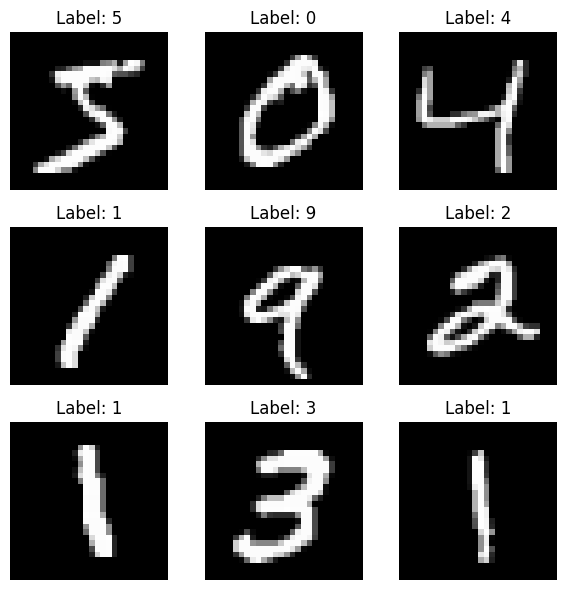

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize a few samples
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
# Reshape data to fit the model (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8596 - loss: 0.4558 - val_accuracy: 0.9803 - val_loss: 0.0691
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9812 - loss: 0.0616 - val_accuracy: 0.9880 - val_loss: 0.0449
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9872 - loss: 0.0412 - val_accuracy: 0.9895 - val_loss: 0.0370
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9842 - val_loss: 0.0528
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9903 - val_loss: 0.0378


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9863 - loss: 0.0396

Test Accuracy: 0.9893


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


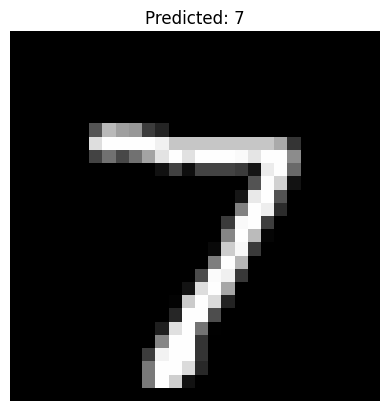

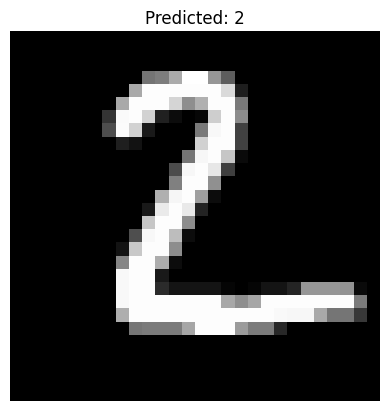

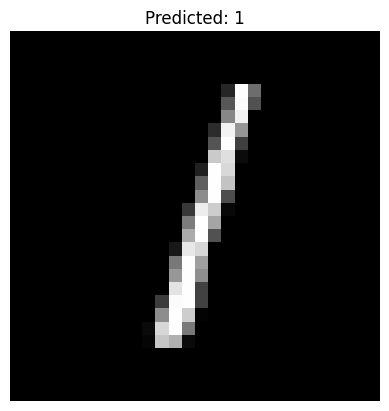

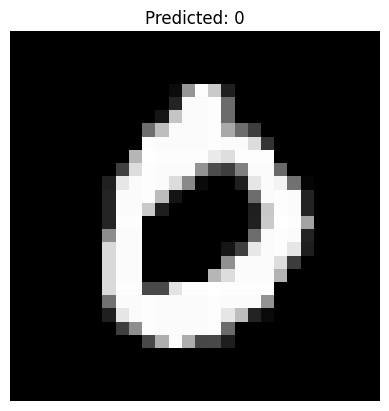

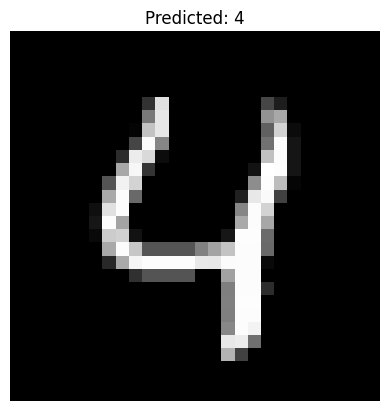

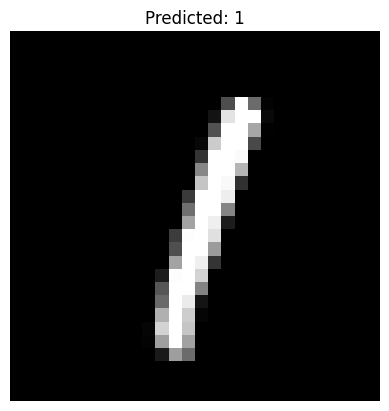

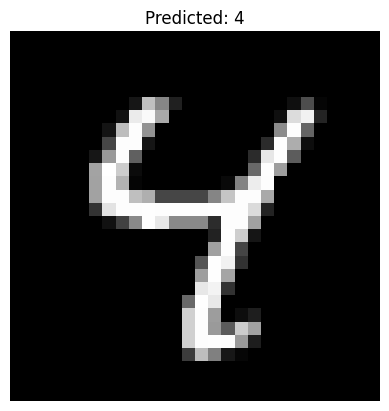

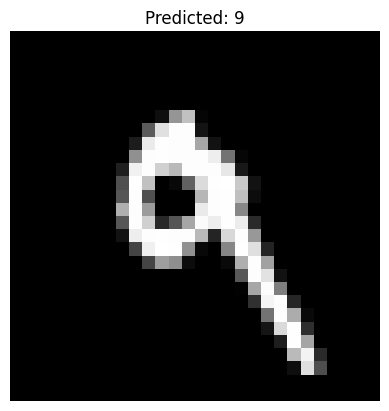

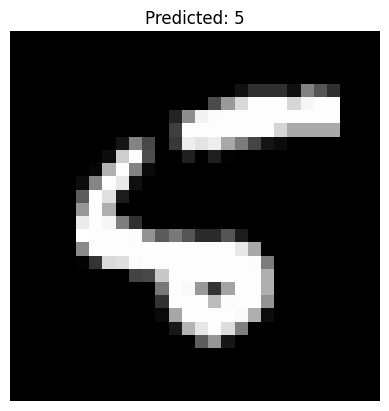

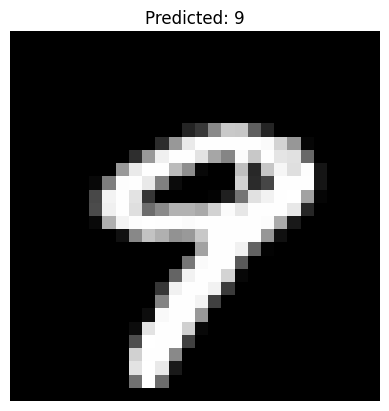

In [9]:
# Predict the first 10 test samples
predictions = model.predict(x_test[:10])

# Plot predictions
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

In [10]:
# Save
model.save("digit_recognizer_model.h5")